In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helpers

# Set GD limit
limit = 3

# Set CSV paths
teams_csv = 'data/2025/mens_prem_teams.csv'
scores_csv = 'data/2025/2025-06-29_mens_prem_results.csv'

In [72]:
teams_df = pd.read_csv(teams_csv)
teams_df

,Club ID,Club
0,175308,ALLIANCE UNITED MEN
1,175320,BURLINGTON SC MEN
2,175382,FC LONDON MEN
3,175337,NORTH TORONTO MEN
4,183404,OAKVILLE SC MEN
5,175349,SCROSOPPI FC MEN
6,175355,SIGMA FC MEN
7,175358,SIMCOE COUNTY ROVERS FC MEN
8,175397,ST CATHARINES ROMA MEN
9,175294,VAUGHAN AZZURRI MEN


In [73]:
scores_df = pd.read_csv(scores_csv)
season_name = scores_df['Name'].iloc[0]
scores_df


,Match ID,home_result,away_result,Home team,Away team,Name,Match date (EDT)
0,261884769,0,1,175358,175349,League1 Ontario Premier Division (M) 2025,2025-04-19 18:00:00
1,261884770,2,2,175382,175308,League1 Ontario Premier Division (M) 2025,2025-04-19 19:30:00
2,261884771,1,0,183404,175320,League1 Ontario Premier Division (M) 2025,2025-04-20 16:00:00
3,261884772,4,1,175294,175397,League1 Ontario Premier Division (M) 2025,2025-04-19 18:30:00
4,261884773,2,0,175349,175355,League1 Ontario Premier Division (M) 2025,2025-04-22 21:00:00
5,261884774,3,1,175397,175337,League1 Ontario Premier Division (M) 2025,2025-04-26 18:00:00
6,261884775,3,1,175358,175320,League1 Ontario Premier Division (M) 2025,2025-04-27 18:00:00
7,261884776,1,0,175367,183404,League1 Ontario Premier Division (M) 2025,2025-04-27 19:00:00
8,261884777,2,5,175294,175308,League1 Ontario Premier Division (M) 2025,2025-04-27 20:30:00
9,261884778,0,2,175382,175294,League1 Ontario Premier Division (M) 2025,2025-05-03 20:00:00


In [74]:
scores_list = scores_df.to_numpy()
teams_list = teams_df.to_numpy()

X = np.array(helpers.buildScoresArray(scores_list, teams_list))

In [75]:
teams = teams_df['Club'].tolist()
match_ids = scores_df['Match ID'].tolist()

X_df = pd.DataFrame(X, index=match_ids, columns=teams)
print(X_df.to_string())

           ALLIANCE UNITED MEN  BURLINGTON SC MEN  FC LONDON MEN  NORTH TORONTO MEN  OAKVILLE SC MEN  SCROSOPPI FC MEN  SIGMA FC MEN  SIMCOE COUNTY ROVERS FC MEN  ST CATHARINES ROMA MEN  VAUGHAN AZZURRI MEN  WOODBRIDGE STRIKERS MEN
261884769                    0                  0              0                  0                0                 1             0                           -1                       0                    0                        0
261884770                   -1                  0              1                  0                0                 0             0                            0                       0                    0                        0
261884771                    0                 -1              0                  0                1                 0             0                            0                       0                    0                        0
261884772                    0                  0              0        

In [76]:
print(X_df.T.to_string())

                             261884769  261884770  261884771  261884772  261884773  261884774  261884775  261884776  261884777  261884778  261884779  261884780  261884781  261884782  261884783  261884784  261884785  261884786  261884787  261884788  261884789  261884790  261884791  261884792  261884793  261884794  261884795  261884796  261884797  261884798  261884799  261884800  261884801  261884802  261884803  261884804  261884805  261884806  261884807  261884808  261884809  261884810  261884811  261884812  261884813  261884814  261884815  261884816  261884817  261884818  261884819  261884820  261884821  261884822  261884823  261884824  261884826  261884849
ALLIANCE UNITED MEN                  0         -1          0          0          0          0          0          0          1          0          0          0          0         -1          0          1          0          0          0          0          0          0          1          0          0          0          0          

In [77]:
M = (X.T).dot(X)
M_df = pd.DataFrame(M, index=teams, columns=teams)
print(M_df.to_string())

                             ALLIANCE UNITED MEN  BURLINGTON SC MEN  FC LONDON MEN  NORTH TORONTO MEN  OAKVILLE SC MEN  SCROSOPPI FC MEN  SIGMA FC MEN  SIMCOE COUNTY ROVERS FC MEN  ST CATHARINES ROMA MEN  VAUGHAN AZZURRI MEN  WOODBRIDGE STRIKERS MEN
ALLIANCE UNITED MEN                           12                 -2             -1                 -2                0                -2            -2                           -1                       0                   -1                       -1
BURLINGTON SC MEN                             -2                 10             -1                  0               -1                 0            -2                           -1                      -2                    0                       -1
FC LONDON MEN                                 -1                 -1             11                 -1               -1                -2            -2                           -1                       0                   -2                        0


In [78]:
M_bar = M.copy()
M_bar[-1,:] = np.ones(M.shape[0])
M_bar
M_bar_df = pd.DataFrame(M_bar, index=teams, columns=teams)
print(M_bar_df.to_string())

                             ALLIANCE UNITED MEN  BURLINGTON SC MEN  FC LONDON MEN  NORTH TORONTO MEN  OAKVILLE SC MEN  SCROSOPPI FC MEN  SIGMA FC MEN  SIMCOE COUNTY ROVERS FC MEN  ST CATHARINES ROMA MEN  VAUGHAN AZZURRI MEN  WOODBRIDGE STRIKERS MEN
ALLIANCE UNITED MEN                           12                 -2             -1                 -2                0                -2            -2                           -1                       0                   -1                       -1
BURLINGTON SC MEN                             -2                 10             -1                  0               -1                 0            -2                           -1                      -2                    0                       -1
FC LONDON MEN                                 -1                 -1             11                 -1               -1                -2            -2                           -1                       0                   -2                        0


In [79]:
p = np.array(helpers.buildGDArray(scores_list, teams_list))
p_bar = p
p_bar[-1] = 0
p_bar_df = pd.DataFrame(p_bar, index=teams, columns=['GD'])
print(p_bar_df.to_string())

                             GD
ALLIANCE UNITED MEN           6
BURLINGTON SC MEN             3
FC LONDON MEN               -18
NORTH TORONTO MEN           -10
OAKVILLE SC MEN               4
SCROSOPPI FC MEN              5
SIGMA FC MEN                 -9
SIMCOE COUNTY ROVERS FC MEN   7
ST CATHARINES ROMA MEN       -1
VAUGHAN AZZURRI MEN           4
WOODBRIDGE STRIKERS MEN       0


In [80]:
# gd vector with blowouts accounted for
p_bw = np.array(helpers.buildGDArray(scores_list, teams_list, 3))
p_bar_bw = p_bw
p_bar_bw[-1] = 0
p_bar_bw_df = pd.DataFrame(p_bar_bw, index=teams, columns=['GD with limited blowouts'])
print(p_bar_bw_df.to_string())

                             GD with limited blowouts
ALLIANCE UNITED MEN                                 6
BURLINGTON SC MEN                                   2
FC LONDON MEN                                     -15
NORTH TORONTO MEN                                  -9
OAKVILLE SC MEN                                     4
SCROSOPPI FC MEN                                    3
SIGMA FC MEN                                       -8
SIMCOE COUNTY ROVERS FC MEN                         7
ST CATHARINES ROMA MEN                             -1
VAUGHAN AZZURRI MEN                                 3
WOODBRIDGE STRIKERS MEN                             0


In [81]:
r = np.linalg.inv(M_bar).dot(p_bar)
r_df = pd.DataFrame(r, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_df)

                             massey_rating
WOODBRIDGE STRIKERS MEN           1.250225
SIMCOE COUNTY ROVERS FC MEN       0.657049
SCROSOPPI FC MEN                  0.380065
OAKVILLE SC MEN                   0.372979
ALLIANCE UNITED MEN               0.329224
BURLINGTON SC MEN                 0.258453
ST CATHARINES ROMA MEN            0.185237
VAUGHAN AZZURRI MEN               0.037570
NORTH TORONTO MEN                -0.773272
SIGMA FC MEN                     -1.027118
FC LONDON MEN                    -1.670412


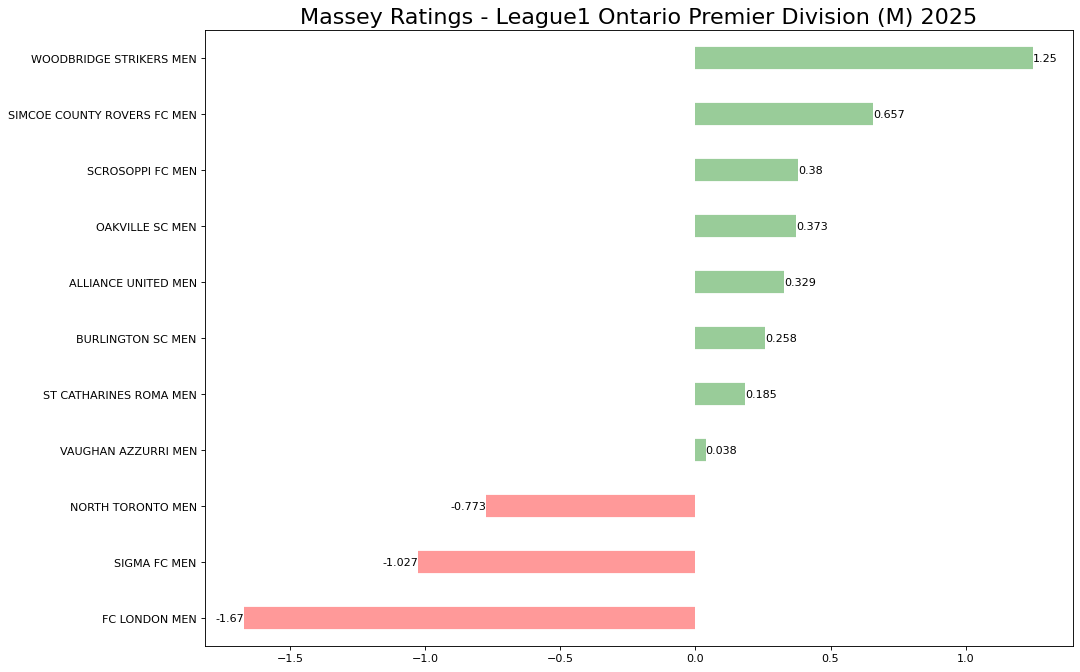

In [82]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_df = r_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_df['massey_rating']]
plt.hlines(y=r_df.index, xmin=0, xmax=r_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title(f'Massey Ratings - {season_name}', fontdict={'size': 20})

# Displaying the Diverging Bar Chart
plt.show()

In [83]:
r_bw = np.linalg.inv(M_bar).dot(p_bar_bw)
r_bw_df = pd.DataFrame(r_bw, index=teams, columns=['massey_rating']).sort_values(by=['massey_rating'], ascending=False)
print(r_bw_df)

                             massey_rating
WOODBRIDGE STRIKERS MEN           1.112533
SIMCOE COUNTY ROVERS FC MEN       0.643468
OAKVILLE SC MEN                   0.387023
ALLIANCE UNITED MEN               0.327769
SCROSOPPI FC MEN                  0.201097
BURLINGTON SC MEN                 0.183787
ST CATHARINES ROMA MEN            0.147537
VAUGHAN AZZURRI MEN               0.000986
NORTH TORONTO MEN                -0.668885
SIGMA FC MEN                     -0.920446
FC LONDON MEN                    -1.414869


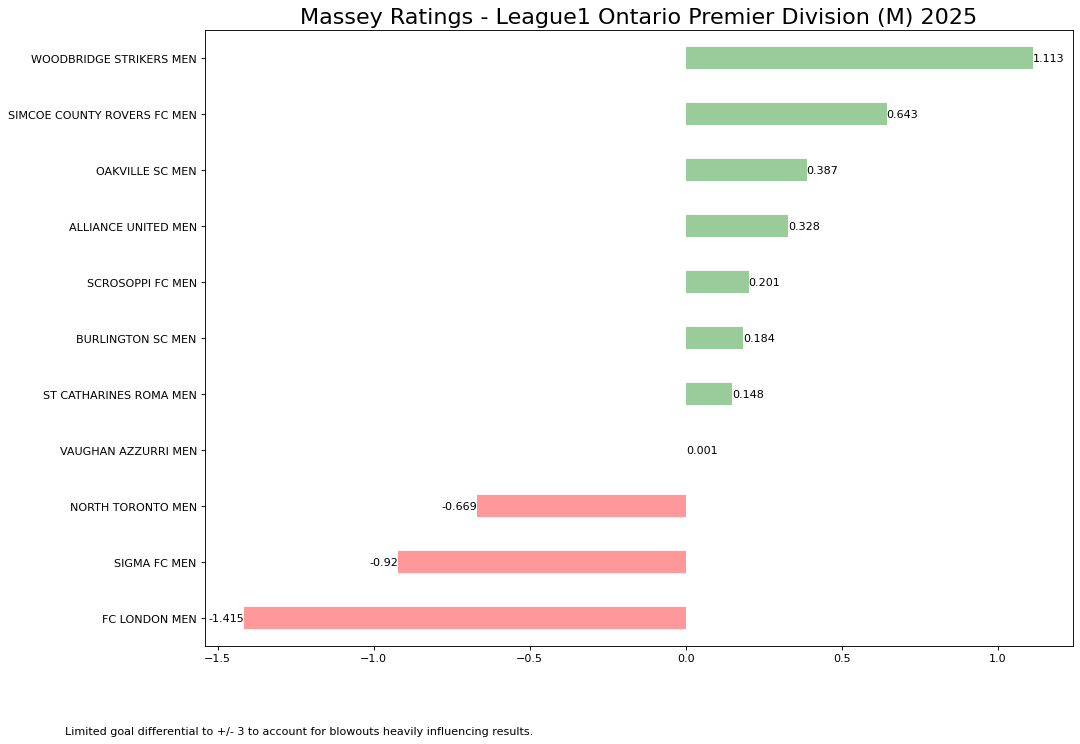

In [84]:
# Draw plot
plt.figure(figsize=(14, 10), dpi=80)

# resort values
r_bw_df = r_bw_df.sort_values(by=['massey_rating'])

# Plotting the horizontal lines
clrs = ['r' if (x < 0) else 'g' for x in r_bw_df['massey_rating']]
plt.hlines(y=r_bw_df.index, xmin=0, xmax=r_bw_df.massey_rating, linewidth=20, colors=clrs, alpha=0.4)
for index, value in enumerate(r_bw_df.massey_rating):
  alignment = 'left'
  if value < 0:
    alignment = 'right'
  plt.text(value, index, str(round(value, 3)), ha=alignment, va='center')

# Title of Bar Chart
plt.title(f'Massey Ratings - {season_name}', fontdict={'size': 20})
plt.figtext(s=f'Limited goal differential to +/- {str(limit)} to account for blowouts heavily influencing results.', y=0, x=0)

# Displaying the Diverging Bar Chart
plt.show()